In [12]:
#Importing 
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the dataset
data = pd.read_csv('C:/Users/user/Desktop/Graduate Applications/Flood Data/Flood_Data1.csv')

# Inspect the first few rows
print(data.head())

   YEAR  STATE  FLOOD OCCURENCE     RH  MAX_TEMP  MIN_TEMP  PRECIPITATION
0  1990  BENUE                0  77.38     35.99     14.08        1165.43
1  1990    FCT                0  74.44     38.61     13.43        1270.90
2  1990   KOGI                0  77.50     36.12     16.42         949.22
3  1990  KWARA                0  68.44     39.73     15.85         849.02
4  1990   NASS                0  74.12     38.76     14.87        1244.53


In [14]:
# Define the features (X) and target (y)
X = data.drop(columns=['FLOOD OCCURENCE'])  # All independent variables
y = data['FLOOD OCCURENCE']  # Dependent variable

# If 'State' is categorical, you need to encode it
X = pd.get_dummies(X, columns=['STATE'], drop_first=True)

# Check the processed data
print(X.head())

   YEAR     RH  MAX_TEMP  MIN_TEMP  PRECIPITATION  STATE_FCT  STATE_KOGI  \
0  1990  77.38     35.99     14.08        1165.43      False       False   
1  1990  74.44     38.61     13.43        1270.90       True       False   
2  1990  77.50     36.12     16.42         949.22      False        True   
3  1990  68.44     39.73     15.85         849.02      False       False   
4  1990  74.12     38.76     14.87        1244.53      False       False   

   STATE_KWARA  STATE_NASS  STATE_NIGER  STATE_PLATEAU  
0        False       False        False          False  
1        False       False        False          False  
2        False       False        False          False  
3         True       False        False          False  
4        False        True        False          False  


In [15]:
#Spliting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Gradient Boosting classifier
gbm_clf = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters and their respective values to be tested
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gbm_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation accuracy: 0.85
Test accuracy: 0.87


In [21]:
# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the results
print(f"MAPE: {mape:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

MAPE: 0.1286
MSE: 0.1286
R²: -0.0500
RMSE: 0.3586


In [22]:
# Make predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
auc_roc = roc_auc_score(y_test, y_proba)

# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

Accuracy: 0.87
Precision: 1.00
Recall: 0.10
F1-Score: 0.18
AUC-ROC: 0.69


In [23]:
best_model.score(X_test, y_test)

0.8714285714285714

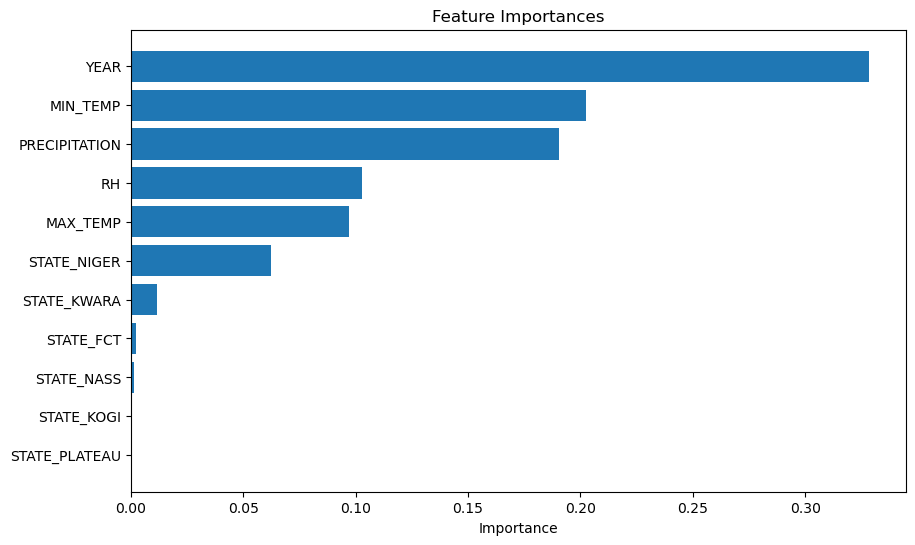

In [31]:
# Plot feature importances
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')
plt.savefig('C:/Users/user/Desktop/Graduate Applications/Manuscripts/Flood prediction/image2', dpi=200)
plt.show()

In [25]:
# Finding the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.14%


In [26]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

# Compute metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² (Goodness of Fit): {r2:.2f}")

Mean Absolute Percentage Error (MAPE): 0.13%
Root Mean Square Error (RMSE): 0.36
Mean Absolute Error (MAE): 0.13
R² (Goodness of Fit): -0.05


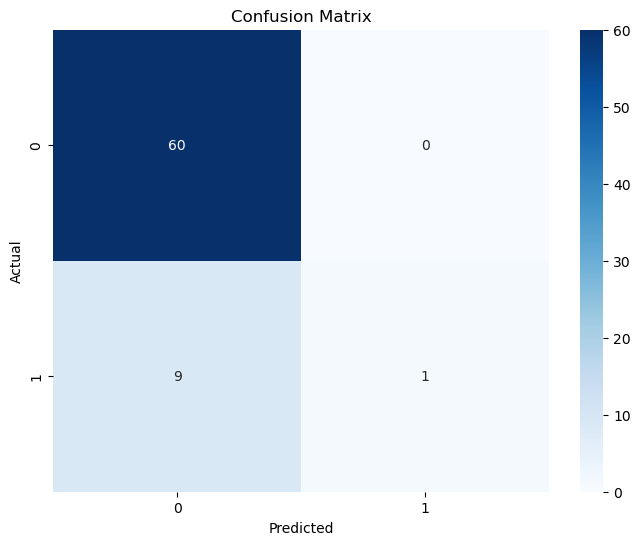

In [30]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
#plt.savefig('C:/Users/user/Desktop/Graduate Applications/Manuscripts/Flood prediction/image1', dpi=200)
plt.show()

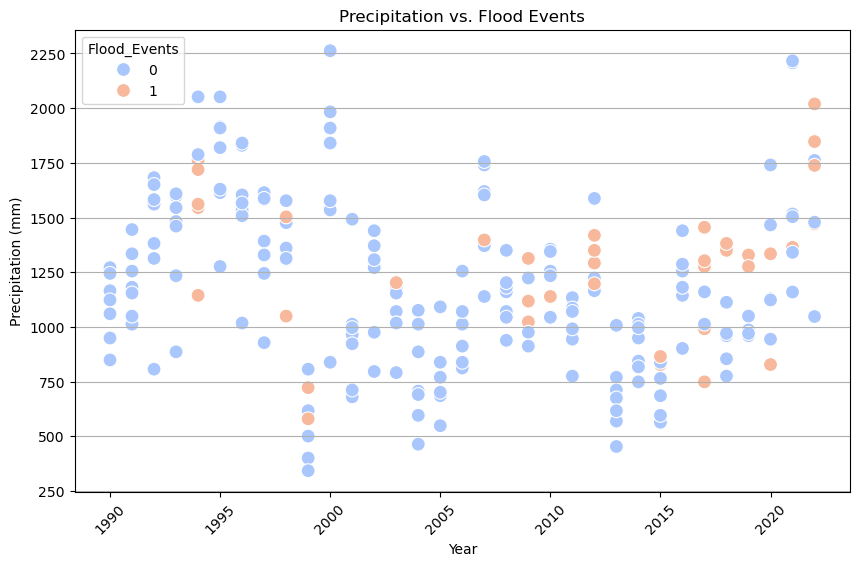

In [73]:
df = pd.DataFrame({
    'Precipitation': data['PRECIPITATION'],
    'Date': data['YEAR'],
    'Flood_Events': data['FLOOD OCCURENCE']
})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Date', y='Precipitation', hue='Flood_Events', palette='coolwarm', s=100)
plt.title('Precipitation vs. Flood Events')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
#plt.savefig('C:/Users/user/Desktop/Graduate Applications/Manuscripts/Flood prediction/image3', dpi=200)
plt.show()

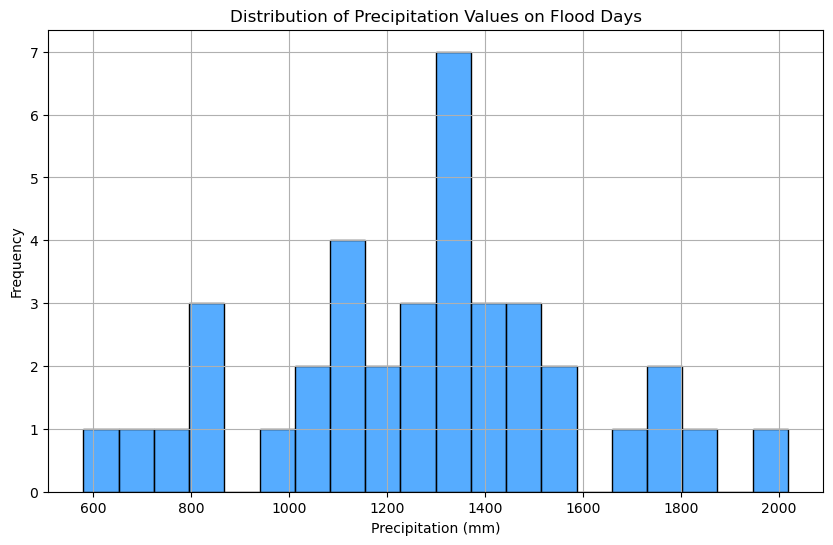

In [75]:
# Filter DataFrame for flood days
flood_days = df[df['Flood_Events'] == 1]

# Histogram or bar chart
plt.figure(figsize=(10, 6))
sns.histplot(flood_days['Precipitation'], bins=20, kde=False, color='dodgerblue')
plt.title('Distribution of Precipitation Values on Flood Days')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('C:/Users/user/Desktop/Graduate Applications/Manuscripts/Flood prediction/image4', dpi=200)
plt.show()

In [ ]:
# Filter DataFrame for flood days
flood_days = df[df['Flood_Events'] == 1]

# Histogram or bar chart
plt.figure(figsize=(10, 6))
sns.histplot(flood_days['Precipitation'], bins=20, kde=False, color='dodgerblue')
plt.title('Distribution of Precipitation Values on Flood Days')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('C:/Users/user/Desktop/Graduate Applications/Manuscripts/Flood prediction/image4', dpi=200)
plt.show()